In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import sys
import os
import scipy

I:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import tensorflow as tf

In [9]:
tf.app.flags.DEFINE_string('data_dir','cifar10_data','add path')

In [10]:
FLAGS = tf.app.flags.FLAGS

In [11]:
FLAGS.data_dir='cifar10_data/'

In [12]:
FLAGS.get_flag_value()

tensorflow是双队列 一个是文件名队列 一个是内存队列  
tensorflow中不需要创建内存队列 使用reader对象从文件名队列中读取数据就可以了


In [13]:
tf.train.string_input_producer() #创建一个文件名队列
tf.train.start_queue_runners() #启动填充队列的线程

TypeError: string_input_producer() missing 1 required positional argument: 'string_tensor'

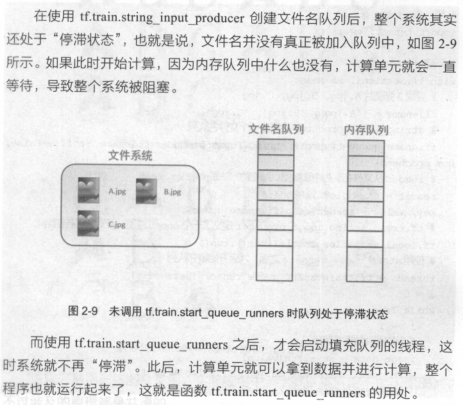

In [18]:
with tf.Session() as sess:
    filename=['1.jpg','2.jpg','3.jpg']
    
    filename_queue = tf.train.string_input_producer(filename , shuffle=False,
                                                   num_epochs=5)
    
    reader = tf.WholeFileReader()
    
    key , value = reader.read(filename_queue)
    
    tf.local_variables_initializer().run()
    
    #使用start_queue_runners 才会开始填充队列
    threads = tf.train.start_queue_runners(sess=sess)
    
    i=0
    
    #会保存15张图片 epoch=3 3*5=15
    while True:
        i += 1
        image_data = sess.run(value)
        print(sess.run(key))
        with open('read/test_%d.jpg' % i , 'wb') as f:
            f.write(image_data)

b'2.jpg'
b'1.jpg'
b'3.jpg'
b'2.jpg'
b'1.jpg'
b'3.jpg'
b'2.jpg'


OutOfRangeError: FIFOQueue '_11_input_producer_4' is closed and has insufficient elements (requested 1, current size 0)
	 [[Node: ReaderReadV2_3 = ReaderReadV2[_device="/job:localhost/replica:0/task:0/device:CPU:0"](WholeFileReaderV2_3, input_producer_4)]]

Caused by op 'ReaderReadV2_3', defined at:
  File "I:\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "I:\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "I:\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "I:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "I:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "I:\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "I:\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "I:\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "I:\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "I:\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "I:\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "I:\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "I:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "I:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "I:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "I:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "I:\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "I:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "I:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "I:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-59c4c2553d13>", line 9, in <module>
    key , value = reader.read(filename_queue)
  File "I:\Anaconda3\lib\site-packages\tensorflow\python\ops\io_ops.py", line 211, in read
    return gen_io_ops.reader_read_v2(self._reader_ref, queue_ref, name=name)
  File "I:\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 977, in reader_read_v2
    queue_handle=queue_handle, name=name)
  File "I:\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "I:\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "I:\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

OutOfRangeError (see above for traceback): FIFOQueue '_11_input_producer_4' is closed and has insufficient elements (requested 1, current size 0)
	 [[Node: ReaderReadV2_3 = ReaderReadV2[_device="/job:localhost/replica:0/task:0/device:CPU:0"](WholeFileReaderV2_3, input_producer_4)]]


In [36]:
[os.path.join('cifar10_data/cifar-10-python/cifar-10-batches-py/' , 'data_batch_%d.bin' % i) for i in range(1,6)]

['cifar10_data/cifar-10-python/cifar-10-batches-py/data_batch_1.bin',
 'cifar10_data/cifar-10-python/cifar-10-batches-py/data_batch_2.bin',
 'cifar10_data/cifar-10-python/cifar-10-batches-py/data_batch_3.bin',
 'cifar10_data/cifar-10-python/cifar-10-batches-py/data_batch_4.bin',
 'cifar10_data/cifar-10-python/cifar-10-batches-py/data_batch_5.bin']

In [3]:
import cifar10_input

In [6]:
def inputs_origin(data_dir):
    filenames = [os.path.join(data_dir , 'data_batch_%d.bin' % i) for i in range(1,6)]
    
    filename_queue = tf.train.string_input_producer(filenames)
    
    read_input = cifar10_input.read_cifar10(filename_queue)
    
    reshaped_image = tf.cast(read_input.uint8image , tf.float32)
    
    return reshaped_image

In [ ]:
with tf.Session() as sess:
    reshaped_image = inputs_origin('cifar10_data/cifar-10-python/cifar-10-batches-py/')
    
    threads = tf.train.start_queue_runners(sess=sess)
    
    sess.run(tf.global_variables_initializer())
    
    for i in range(30):
        image_array = sess.run(reshaped_image)
        
        scipy.misc.toimage(image_array).save('cifar10_data/raw/%d.jpg' % i)

In [1]:
11+1

12

In [2]:
import tensorflow as tf

I:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


tf.random_crop() #随机裁剪  
tf.image.random_flip_left_right() #水平翻转  
tf.image.random_flip_up_down() #上下翻转  
tf.image.random_brightness() #改变亮度  
tf.image.random_contrast() #改变对比度  
tf.image.random_saturation() #改变饱和度  
tf.image.random_hue() #改变色调  

In [ ]:
tf.nn.zero_fraction()

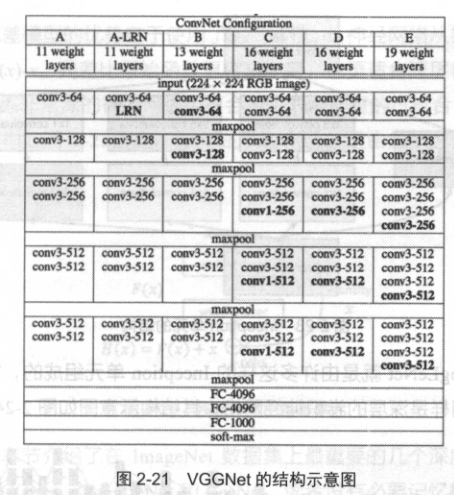
上图是VGG结构  
一共有6中结构  
其中VGG-D就是VGG16  
VGG-E就是VGG19  

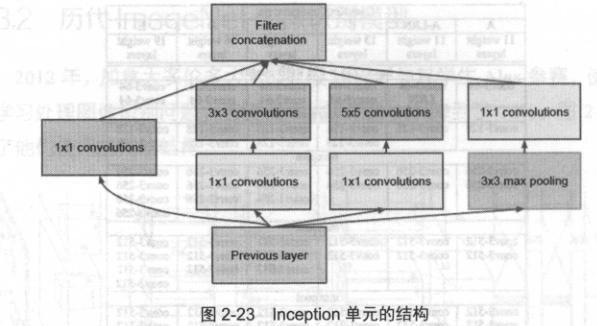
上图为inception v1  
后续还有inception v2
inception v3
inception v4

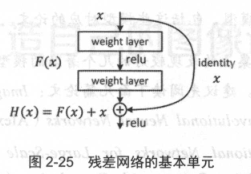

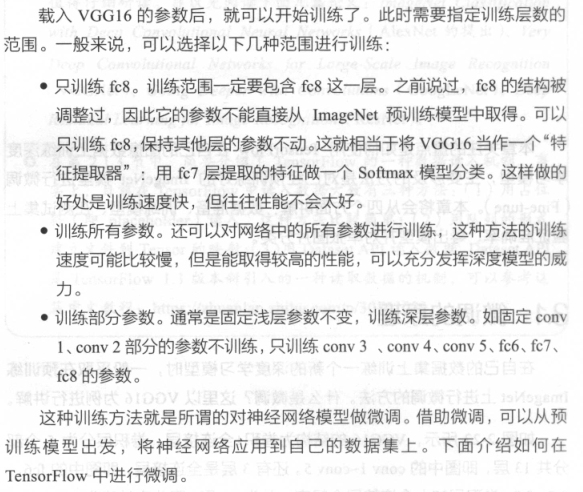